<a href="https://colab.research.google.com/github/funabashi800/bandGapEstimation/blob/master/Store_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# filter warnings messages from the notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set pandas view options
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
!pip install matminer

    100% |████████████████████████████████| 4.1MB 3.8MB/s 
    100% |████████████████████████████████| 409kB 21.4MB/s 
    100% |████████████████████████████████| 163kB 17.6MB/s 
    100% |████████████████████████████████| 51kB 17.5MB/s 
    100% |████████████████████████████████| 37.8MB 730kB/s 
    100% |████████████████████████████████| 81kB 23.3MB/s 
    100% |████████████████████████████████| 2.1MB 10.8MB/s 
    100% |████████████████████████████████| 102kB 27.6MB/s 
    100% |████████████████████████████████| 430kB 23.9MB/s 
    100% |████████████████████████████████| 163kB 30.5MB/s 
  Running setup.py bdist_wheel for matminer ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/97/a0/c2/71d4e628101b82e394836c909a0cd3ebce4bd18436c3210e4e
  Running setup.py bdist_wheel for pint ... - \ done
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
  Running setup.py bdist_wheel for citrination-client ... - \ d

In [32]:
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

api_key = "2vg9wZLez5OM6HFn"  # Set your MP API key here. If set as an environment variable 'MAPI_KEY', set it to 'None'
mpr = MPDataRetrieval(api_key)     # Create an adapter to the MP Database.

# criteria is to get all binary compounds
criteria = {'nelements': 2}

# properties are the materials attributes we want
# See https://github.com/materialsproject/mapidoc for available properties you can specify
properties = ['pretty_formula', 'spacegroup.symbol', 'formation_energy_per_atom', 'band_gap', 'e_above_hull', 
              'density', 'volume', 'nsites']

# get the data!
df_mp = mpr.get_dataframe(criteria=criteria, properties=properties)
print('Number of binary compounds extracted = {}'.format(len(df_mp)))

Number of binary compounds extracted = 13832


In [5]:
insb = mpr.get_dataframe(criteria={'pretty_formula': 'InSb'}, properties=properties)
print('Number of binary compounds extracted = {}'.format(len(insb)))

Number of binary compounds extracted = 9


In [6]:
df_mp.head()

,pretty_formula,spacegroup.symbol,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites
material_id,,,,,,,,
mp-865950,AcAg3,P6_3/mmc,-0.206854,0.0000,0.0,8.930827,204.751583,8
mp-866199,AcAg,Pm-3m,-0.268366,0.0000,0.0,8.859009,62.767941,2
mp-862617,AcAl3,P6_3/mmc,-0.368426,0.0000,0.0,5.243536,195.041675,8
mp-867838,AcAu3,P6_3/mmc,-0.693050,0.0000,0.0,13.755798,197.466462,8
mp-27972,AcBr3,P6_3/m,-2.103586,4.1045,0.0,5.570195,278.264428,8


In [7]:
# Originaly all of the data of band gap in the database is zero!
insb

,pretty_formula,spacegroup.symbol,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites
material_id,,,,,,,,
mp-684597,InSb,Imm2,0.007750,0.0,0.134845,6.896150,56.966136,2
mp-569020,InSb,Pmmn,0.009746,0.0,0.136842,6.935338,113.288489,4
mp-20012,InSb,F-43m,-0.127096,0.0,0.000000,5.384060,72.964821,2
mp-1007661,InSb,P6_3mc,-0.115320,0.0,0.011776,5.369502,146.325303,4
mp-10148,InSb,Pm-3m,0.110811,0.0,0.237906,7.116261,55.204131,2
mp-19744,InSb,Pmm2,0.065197,0.0,0.192293,6.693283,58.692722,2
mp-21210,InSb,Cmcm,0.022714,0.0,0.149810,6.792776,115.666110,4
mp-20253,InSb,Cmcm,-0.006128,0.0,0.120968,6.771521,348.087529,12
mp-10149,InSb,Fm-3m,0.020779,0.0,0.147875,6.765321,58.067758,2


In [0]:
df_mp = df_mp[df_mp['e_above_hull'] < 0.1]
insb = insb[insb['e_above_hull'] < 0.1 ]

In [21]:
df_mp.describe()

,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites,vpa
count,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000
mean,-0.778199,0.647874,0.016442,6.786125,361.477718,15.806328,23.990775
std,0.917393,1.394880,0.025991,3.575119,528.826338,21.274754,13.918948
min,-4.522664,0.000000,0.000000,0.222775,11.917209,2.000000,5.769662
25%,-0.980044,0.000000,0.000000,4.079698,98.954309,4.000000,15.450866
50%,-0.441272,0.000000,0.000236,6.371439,191.015831,8.000000,20.936737
75%,-0.168540,0.461875,0.023858,8.717774,384.010732,16.000000,28.571308
max,0.099969,9.061200,0.099988,21.676369,6897.599713,192.000000,393.349951


In [22]:
insb.describe()

,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites,vpa
count,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000
mean,-0.121208,0.0,0.005888,5.376781,109.645062,3.000000,36.531868
std,0.008327,0.0,0.008327,0.010294,51.873694,1.414214,0.069944
min,-0.127096,0.0,0.000000,5.369502,72.964821,2.000000,36.482411
25%,-0.124152,0.0,0.002944,5.373142,91.304942,2.500000,36.507139
50%,-0.121208,0.0,0.005888,5.376781,109.645062,3.000000,36.531868
75%,-0.118264,0.0,0.008832,5.380421,127.985183,3.500000,36.556597
max,-0.115320,0.0,0.011776,5.384060,146.325303,4.000000,36.581326


In [0]:
# add volume per atom descriptor
df_mp['vpa'] = df_mp['volume']/df_mp['nsites']
insb['vpa'] = insb['volume']/insb['nsites']

In [24]:
# target output column
y = df_mp['band_gap'].values

# possible descriptor columns
X_cols = [c for c in df_mp.columns 
          if c not in ['band_gap', 'pretty_formula', 
                       'volume', 'nsites', 'spacegroup.symbol', 'e_above_hull']]
X = df_mp.as_matrix(X_cols)

print("Possible descriptors are: {}".format(X_cols))

Possible descriptors are: ['formation_energy_per_atom', 'density', 'vpa']


In [25]:
# possible descriptor columns in InSb
X_cols_insb = [c for c in df_mp.columns 
          if c not in ['band_gap', 'pretty_formula', 
                       'volume', 'nsites', 'spacegroup.symbol', 'e_above_hull']]
X_insb = insb.as_matrix(X_cols_insb)

print("Possible descriptors are: {}".format(X_cols_insb))

Possible descriptors are: ['formation_energy_per_atom', 'density', 'vpa']


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()

linear_regression.fit(X, y)

# get fit statistics
print ('R2 = ' + str(round(linear_regression.score(X, y), 3)))
print ('RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=linear_regression.predict(X))))

R2 = 0.472
RMSE = 1.013


Text(0.5,1,'Random forest regression')

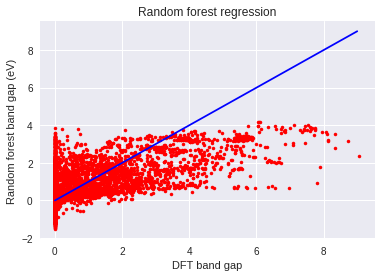

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1 = ax.plot(y,linear_regression.predict(X), "r.")
line2 = ax.plot([0,1,2,3,4,5,6,7,8,9], "b")
ax.set_xlabel('DFT band gap')
ax.set_ylabel('Random forest band gap (eV)')
ax.set_title('Random forest regression')

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF_rg = RandomForestRegressor(n_estimators=50, random_state=1)

RF_rg.fit(X, y)
print ('R2 = ' + str(round(RF_rg.score(X, y), 3)))
print ('RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=RF_rg.predict(X))))

R2 = 0.974
RMSE = 0.226


Text(0.5,1,'Random forest regression')

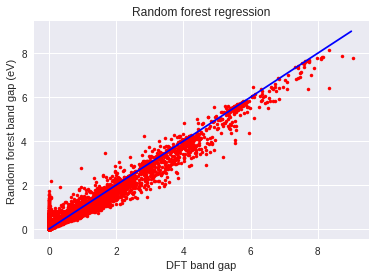

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1 = ax.plot(y, RF_rg.predict(X), "r.")
line2 = ax.plot([0,1,2,3,4,5,6,7,8,9], "b")
ax.set_xlabel('DFT band gap')
ax.set_ylabel('Random forest band gap (eV)')
ax.set_title('Random forest regression')

In [30]:
from sklearn.cross_validation import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)
crossvalidation = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)

# compute cross validation scores for random forest model
scores = cross_val_score(linear_regression, X, y, scoring='neg_mean_squared_error', 
                         cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print ('Cross-validation results:')
print ('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean RMSE: 1.013


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [31]:
# Prediction Result of Band Gap in InSb
print("Expected Band Gap of InSb is : {} eV".format(RF_rg.predict(X_insb)))

Expected Band Gap of InSb is : [0.08716 0.04867] eV


In [34]:
from sklearn.externals import joblib
joblib.dump(RF_rg, 'svc.pkl.cmp', compress=True)

['svc.pkl.cmp']

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
upload_file = drive.CreateFile()
upload_file.SetContentFile("svc.pkl.cmp")
upload_file.Upload()